In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import gym
import neat
from evaluator import Evaluator
from tf_neat.recurrent_net import RecurrentNet

param = {
    "g_s":3,
    "s_s":2,
    "max_state":5,
    "react_depth":1,
    "neuron_num":5,
    "input_num":4,
    "output_num":1
}

def make_env():
    return gym.make("CartPole-v0")


def make_net(genome, config, bs):
    return RecurrentNet.create(genome, config, bs)

def run(n_generations):
    config_path = os.path.join(os.path.dirname(os.path.abspath('')), "lab/neat.cfg")
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_path,
    )

    evaluator = Evaluator(
        make_net, make_env=make_env, param=param
    )

    def eval_genomes(genomes, config):
        for idx, genome in genomes:
            genome.fitness = evaluator.eval_genome(genome, config, idx)

    pop = neat.Population(config)
    pop.run(eval_genomes, n_generations)

run(1)

In [ ]:
a = [1,2,3]
a[-2:]

In [ ]:
import pandas as pd
dict_a = {"a":{"s1":1, "s2":2}, "b":{"s3":3}}
a = pd.DataFrame.from_dict(dict_a).T

C:\Users\arizona\Desktop\Brain\BEAT\lab\system.py:65: RuntimeWarning: overflow encountered in exp
  (np.exp(-0.5*np.dot(grad_x, self.M_)))*\
C:\Users\arizona\Desktop\Brain\BEAT\lab\system.py:65: RuntimeWarning: invalid value encountered in multiply
  (np.exp(-0.5*np.dot(grad_x, self.M_)))*\
C:\Users\arizona\Desktop\Brain\BEAT\lab\system.py:76: RuntimeWarning: overflow encountered in exp
  print(f"(np.exp(np.dot(grad_x, self.M_))-1) {(np.exp(np.dot(grad_x, self.M_)) - 1)}")


debug 
grad_x [[-235.88618706  -78.03317527 -405.71959432 -412.7433236  -414.45043626
  -440.83923913 -444.54562409 -482.0723415  -483.33438391 -484.8492826
  -234.73384156  -76.28998194 -404.31083979 -411.07035547 -413.38104387
  -439.18256755 -443.71258724 -480.50869941 -482.60420466 -483.84535314
  -470.26334094 -153.56063316 -809.56300029 -823.06503517 -827.88502789
  -879.30639817 -888.79396882 -962.10229582 -967.42623656 -969.73463027
  -470.28851201 -153.56129906 -809.59910653 -823.10058652 -827.92281047
  -879.34490904 -888.83532251 -962.14535354 -967.47305562 -969.77962973]]
grad_p [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
np.dot(grad_x, self.M_) [[-1.50903318e+00 -2.50571738e+00 -1.87618835e+00 -2.42161203e+00
  -1.01584462e+00 -2.37208008e+00 -2.97279356e-01 -2.04238718e+00
   7.57468744e-01  3.60650627e-02 -3.31516612e-01 -7.61858147e-01
  -4.31327576e-01 -7.13092544e-01  9.13303399e-02 -6.7

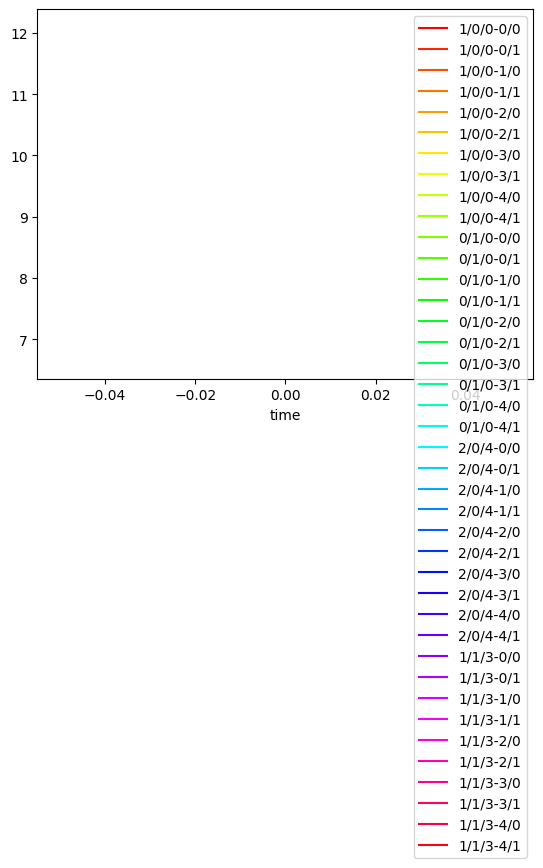

In [1]:
import numpy as np
from simulator import Simulator
time = "2022-04-25-04h-07m-56s"
idx = 2
filepath = f"log\\{time}\\{str(idx)}"
simulator = Simulator.by_file(filepath)


#input_vector = np.array([15,1,2,3])
#simulator.input(input_vector)

simulator.run(0.0000000000000000000001)
simulator.show()


SyntaxError: invalid syntax (<ipython-input-2-ef564cfb81c1>, line 3)

In [2]:
simulator.model

{'x_0': array([[10.9631173 ],
        [ 6.63158911],
        [ 8.81920912],
        [ 6.8176605 ],
        [11.11353642],
        [ 6.81832794],
        [12.11446889],
        [ 6.81843042],
        [ 8.11453456],
        [ 6.81844866],
        [ 9.27368321],
        [ 9.97610393],
        [ 9.98673004],
        [ 9.97602232],
        [ 9.98679985],
        [ 9.97602234],
        [ 9.98679992],
        [ 9.97602234],
        [ 9.98679992],
        [ 9.97602234],
        [ 9.99990663],
        [ 9.96168395],
        [ 9.97506467],
        [ 9.96248403],
        [ 9.97933876],
        [ 9.96249246],
        [ 9.97934522],
        [ 9.96249389],
        [ 9.97934601],
        [ 9.96249415],
        [ 9.95718782],
        [ 9.99934446],
        [ 9.99963837],
        [ 9.99934466],
        [ 9.99963941],
        [ 9.99934466],
        [ 9.99963941],
        [ 9.99934466],
        [ 9.99963941],
        [ 9.99934466]]),
 'p_0': array([[0],
        [0],
        [0],
        [0],
        [0],

In [3]:
simulator.history["xp"][:1]

array([[10.9631173 ,  6.63158911,  8.81920912,  6.8176605 , 11.11353642,
         6.81832794, 12.11446889,  6.81843042,  8.11453456,  6.81844866,
         9.27368321,  9.97610393,  9.98673004,  9.97602232,  9.98679985,
         9.97602234,  9.98679992,  9.97602234,  9.98679992,  9.97602234,
         9.99990663,  9.96168395,  9.97506467,  9.96248403,  9.97933876,
         9.96249246,  9.97934522,  9.96249389,  9.97934601,  9.96249415,
         9.95718782,  9.99934446,  9.99963837,  9.99934466,  9.99963941,
         9.99934466,  9.99963941,  9.99934466,  9.99963941,  9.99934466,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [4]:
from system import System
system = System(simulator.model)

In [5]:
system.energy()

array([-112405.51518392])

In [7]:
np.set_printoptions(precision=6, suppress=True)
system.flow()

debug 
grad_x [[-235.886187  -78.033175 -405.719594 -412.743324 -414.450436 -440.839239
  -444.545624 -482.072342 -483.334384 -484.849283 -234.733842  -76.289982
  -404.31084  -411.070355 -413.381044 -439.182568 -443.712587 -480.508699
  -482.604205 -483.845353 -470.263341 -153.560633 -809.563    -823.065035
  -827.885028 -879.306398 -888.793969 -962.102296 -967.426237 -969.73463
  -470.288512 -153.561299 -809.599107 -823.100587 -827.92281  -879.344909
  -888.835323 -962.145354 -967.473056 -969.77963 ]]
grad_p [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
np.dot(grad_x, self.M_) [[  -1.509033   -2.505717   -1.876188   -2.421612   -1.015845   -2.37208
    -0.297279   -2.042387    0.757469    0.036065   -0.331517   -0.761858
    -0.431328   -0.713093    0.09133    -0.676898    0.577111   -0.435687
     1.534467    1.084994 -157.853012 -158.44386  -158.44386  -316.702708
  -316.727213  169.833407  169.576998  

(array([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]]),
 array([[ -1561.618894],
        [ -6203.987046],
        [   994.972348],
        [  1023.134006],
        [  1029.779616],
        [  1135.517577],
        [  1150.007744],
        [   808.078331],
        [   810.484106],
        [   813.632213],
        [ -1559.087214],
        [ -6213.460416],
        [   995.195292],
        [  1022.23368 ],
        [  1031.475888],
        [  1134.682513]